## **Principal Component Analysis (PCA)**

In [1]:
import numpy as np
import timeit

In [2]:
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

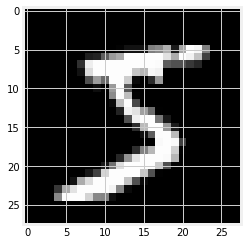

In [4]:
from ipywidgets import interact

from sklearn.datasets import fetch_openml
MNIST = fetch_openml('mnist_784', data_home='./MNIST')
%matplotlib inline

plt.figure(figsize=(4,4))
plt.imshow(MNIST.data[0].reshape(28,28), cmap='gray');

In [5]:
def normalize(X):
    """Normalize the given dataset X
    Args:
        X: ndarray, dataset
    
    Returns:
        (Xbar, mean, std): ndarray, Xbar is the normalized dataset
        with mean 0 and standard deviation 1; mean and std are the 
        mean and standard deviation respectively.
    
    Note:
        we will encounter dimensions where the standard deviation is
        zero, for those when you do normalization the normalized data
        will be NaN. we need to handle this by setting using `std = 1` for those 
        dimensions when doing normalization.
    """
    mu = np.mean(X, axis=0) 
    X = X - mu
    std = np.std(X, axis=0)
    std_filled = std.copy()
    std_filled[std==0] = 1.     
    Xbar = (X-mu) / std_filled 
    return Xbar, mu, std

In [6]:
def eig(S):
    """Compute the eigenvalues and corresponding eigenvectors 
        for the covariance matrix S.
    Args:
        S: ndarray, covariance matrix
    
    Returns:
        (eigvals, eigvecs): ndarray, the eigenvalues and eigenvectors

    Note:
        the eigenvals and eigenvecs SHOULD BE sorted in descending
        order of the eigen values
        
    """
    eig_val, eig_vec = np.linalg.eigh(S)
    sorted_eig  = np.argsort(-eig_val)
    eig_val = eig_val[sorted_eig]
    eig_vec = eig_vec[:, sorted_eig]
    return (eig_val, eig_vec)

In [7]:
def projection_matrix(B):
    """Compute the projection matrix onto the space spanned by `B`
    Args:
        B: ndarray of dimension (D, M), the basis for the subspace
    
    Returns:
        P: the projection matrix
    """
    P = B @ B.T 

    return P

In [8]:
from sklearn import decomposition

def PCA(X, num_components):
    """
    Args:
        X: ndarray of size (N, D), where D is the dimension of the data,
           and N is the number of datapoints
        num_components: the number of principal components to use.
    Returns:
        X_reconstruct: ndarray of the reconstruction
        of X from the first `num_components` principal components.
    """
    # Compute the data covariance matrix S
    M = (X - np.mean(X.T, axis=1))
    S = np.cov(X.T)

    # Next find eigenvalues and corresponding eigenvectors for S by implementing eig().
    eig_vals, eig_vecs = eig(S)
    
    # Select eigen vectors
    U = eig_vecs[:, range(num_components)]
    
    # Reconstruct the images from the lowerdimensional representation
    # To do this, we first need to find the projection_matrix (which you implemented earlier)
    # which projects our input data onto the vector space spanned by the eigenvectors
    P = projection_matrix(U) # projection matrix
    
    # Then for each data point x_i in the dataset X 
    #   we can project the original x_i onto the eigenbasis.
    X_reconstruct =  np.dot(X, P)
    return X_reconstruct

In [9]:
NUM_DATAPOINTS = 1000
X = (MNIST.data.reshape(-1, 28 * 28)[:NUM_DATAPOINTS]) / 255.
Xbar, mu, std = normalize(X)

The greater number of of principal components we use, the smaller will our reconstruction error be.

How many principal components do we need in order to reach a Mean Squared Error (MSE) of less than $100$ for our dataset?

In [10]:
def mse(predict, actual):
    return np.square(predict - actual).sum(axis=1).mean()

In [21]:
loss = []
reconstructions = []
for num_component in range(1, 100):
    reconst = PCA(Xbar, num_component)
    error = mse(reconst, Xbar)
    reconstructions.append(reconst)
    print('n = {:d}, reconstruction_error = {:f}'.format(num_component, error))
    loss.append((num_component, error))

reconstructions = np.asarray(reconstructions)
reconstructions = reconstructions * std + mu # "unnormalize" the reconstructed image
loss = np.asarray(loss)
reconstructions

n = 1, reconstruction_error = 739.482573
n = 2, reconstruction_error = 694.255979
n = 3, reconstruction_error = 665.786339
n = 4, reconstruction_error = 641.996104
n = 5, reconstruction_error = 612.639900
n = 6, reconstruction_error = 585.153682
n = 7, reconstruction_error = 541.928921
n = 8, reconstruction_error = 528.062195
n = 9, reconstruction_error = 499.515496
n = 10, reconstruction_error = 483.150127
n = 11, reconstruction_error = 473.139592
n = 12, reconstruction_error = 457.870942
n = 13, reconstruction_error = 448.967437
n = 14, reconstruction_error = 438.291536
n = 15, reconstruction_error = 427.328590
n = 16, reconstruction_error = 417.602365
n = 17, reconstruction_error = 403.358610
n = 18, reconstruction_error = 395.507924
n = 19, reconstruction_error = 383.179036
n = 20, reconstruction_error = 368.708633
n = 21, reconstruction_error = 362.237542
n = 22, reconstruction_error = 353.525795
n = 23, reconstruction_error = 343.353121
n = 24, reconstruction_error = 335.399738
n

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

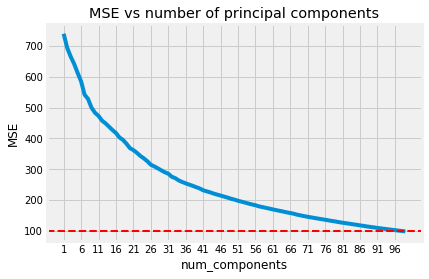

In [23]:
fig, ax = plt.subplots()
ax.plot(loss[:,0], loss[:,1]);
ax.axhline(100, linestyle='--', color='r', linewidth=2)
ax.xaxis.set_ticks(np.arange(1, 100, 5));
ax.set(xlabel='num_components', ylabel='MSE', title='MSE vs number of principal components');

But numbers don't tell us everything! Just what does it mean qualitatively for the loss to decrease from around $700 to less than $100.0$?

Let's find out! In the next cell, we draw the original eight as the leftmost image. Then we show the reconstruction of the image on the right, in descending number of principal components used.

interactive(children=(IntSlider(value=500, description='image_idx', max=1000), Output()), _dom_classes=('widge…

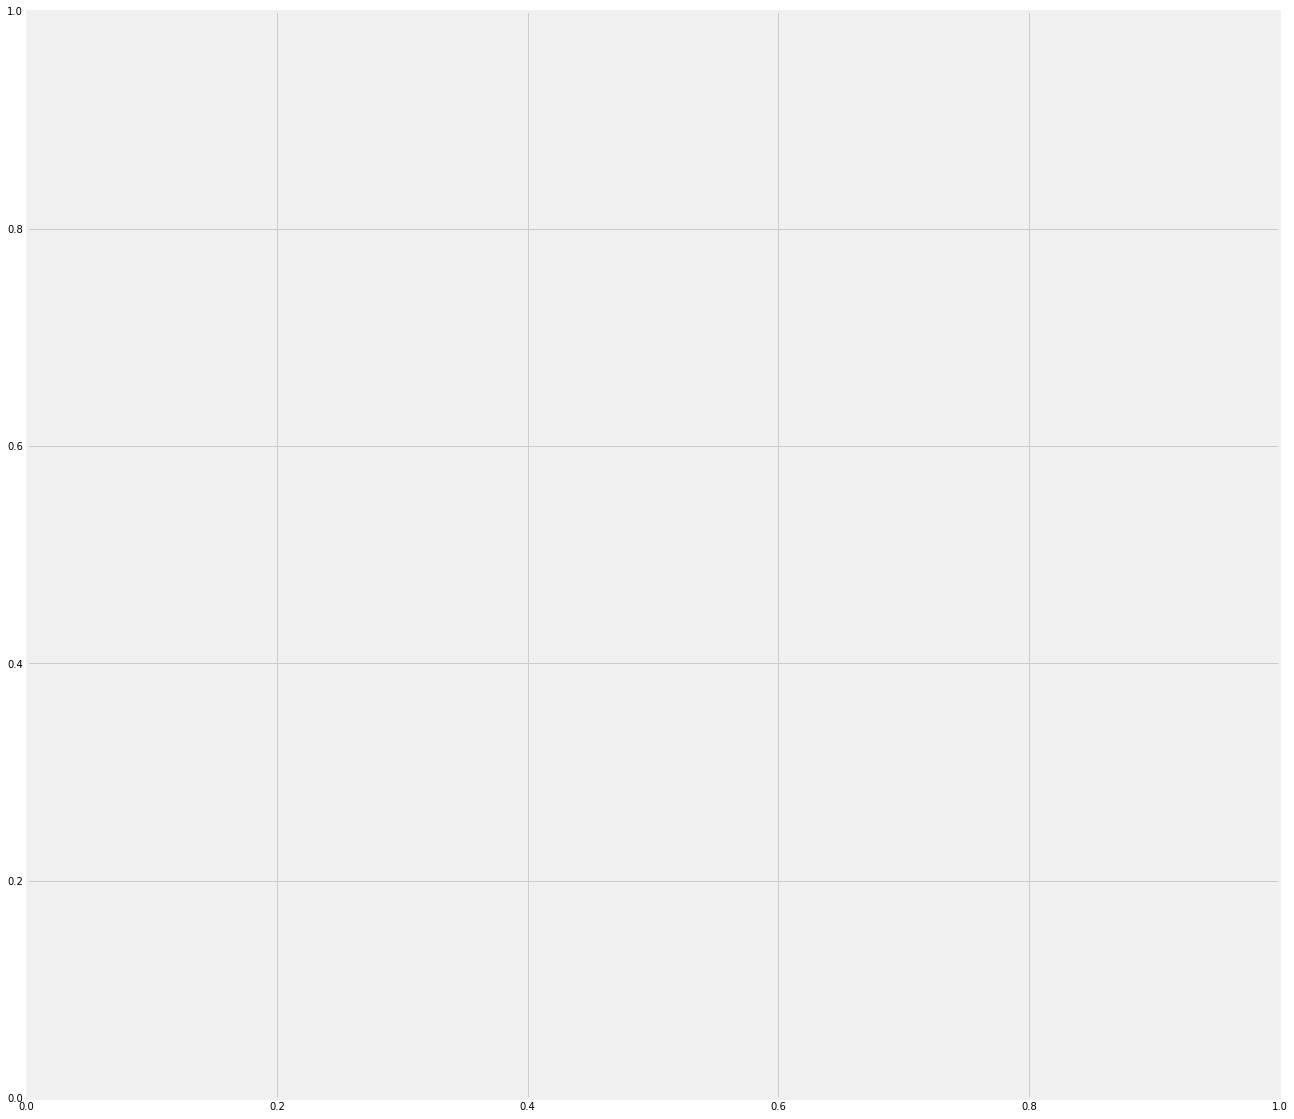

In [24]:
@interact(image_idx=(0, 1000))
def show_num_components_reconst(image_idx):
    fig, ax = plt.subplots(figsize=(20., 20.))
    actual = X[image_idx]
    x = np.concatenate([actual[np.newaxis, :], reconstructions[:, image_idx]])
    ax.imshow(np.hstack(x.reshape(-1, 28, 28)[np.arange(10)]),
              cmap='gray');
    ax.axvline(28, color='orange', linewidth=2)

In [25]:

@interact(i=(0, 10))
def show_pca_digits(i=1):
    plt.figure(figsize=(4,4))
    actual_sample = X[i].reshape(28,28)
    reconst_sample = (reconst[i, :] * std + mu).reshape(28, 28)
    plt.imshow(np.hstack([actual_sample, reconst_sample]), cmap='gray')
    plt.show()

interactive(children=(IntSlider(value=1, description='i', max=10), Output()), _dom_classes=('widget-interact',…

## **PCA for high-dimensional datasets**

In [27]:
def PCA_high_dim(X, num_components):
    """Compute PCA for small sample size. 
    Args:
        X: ndarray of size (N, D), where D is the dimension of the data,
           and N is the number of data points in the training set. You may assume the input 
           has been normalized.
        num_components: the number of principal components to use.
    Returns:
        X_reconstruct: (N, D) ndarray. the reconstruction
        of X from the first `num_components` principal components.
    """
    N, D = X.shape
    M = 1 / N * X @ X.T 
    eig_vals, eig_vecs = eig(M)  
    U = eig_vecs[:, range(num_components)] 
    P = projection_matrix(U) 
    print(P.shape)
    X_reconstruct = P @ X  
    return X_reconstruct

In [28]:
np.testing.assert_almost_equal(PCA(Xbar, 2), PCA_high_dim(Xbar, 2))
print('correct')

(1000, 1000)


AssertionError: ignored

In [29]:
def time(f, repeat=100):
    times = []
    for _ in range(repeat):
        start = timeit.default_timer()
        f()
        stop = timeit.default_timer()
        times.append(stop-start)
    return np.mean(times), np.std(times)

In [30]:
times_mm0 = []
times_mm1 = []

for datasetsize in np.arange(4, 784, step=20):
    XX = Xbar[:datasetsize]
    mu, sigma = time(lambda : XX.T @ XX)
    times_mm0.append((datasetsize, mu, sigma))
    
    mu, sigma = time(lambda : XX @ XX.T)
    times_mm1.append((datasetsize, mu, sigma))
    
times_mm0 = np.asarray(times_mm0)
times_mm1 = np.asarray(times_mm1)

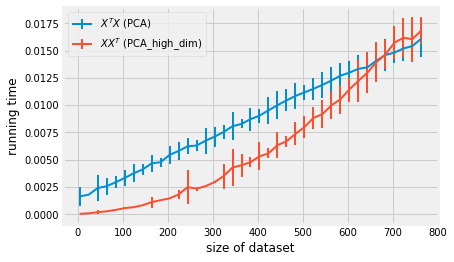

In [31]:
fig, ax = plt.subplots()
ax.set(xlabel='size of dataset', ylabel='running time')
bar = ax.errorbar(times_mm0[:, 0], times_mm0[:, 1], times_mm0[:, 2], label="$X^T X$ (PCA)", linewidth=2)
ax.errorbar(times_mm1[:, 0], times_mm1[:, 1], times_mm1[:, 2], label="$X X^T$ (PCA_high_dim)", linewidth=2)
ax.legend();

In [32]:
%time PCA(Xbar, 2)
%time PCA_high_dim(Xbar, 2)
pass

CPU times: user 330 ms, sys: 55.8 ms, total: 385 ms
Wall time: 201 ms
(1000, 1000)
CPU times: user 694 ms, sys: 150 ms, total: 843 ms
Wall time: 433 ms


Next we benchmark PCA, PCA_high_dim.

In [33]:
times0 = []
times1 = []

# iterate over datasets of different size
for datasetsize in np.arange(4, 784, step=100):
    XX = Xbar[:datasetsize]
    npc = 2
    mu, sigma = time(lambda : PCA(XX, npc), repeat=10)
    times0.append((datasetsize, mu, sigma))
    
    mu, sigma = time(lambda : PCA_high_dim(XX, npc), repeat=10)
    times1.append((datasetsize, mu, sigma))
    
times0 = np.asarray(times0)
times1 = np.asarray(times1)

(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(104, 104)
(104, 104)
(104, 104)
(104, 104)
(104, 104)
(104, 104)
(104, 104)
(104, 104)
(104, 104)
(104, 104)
(204, 204)
(204, 204)
(204, 204)
(204, 204)
(204, 204)
(204, 204)
(204, 204)
(204, 204)
(204, 204)
(204, 204)
(304, 304)
(304, 304)
(304, 304)
(304, 304)
(304, 304)
(304, 304)
(304, 304)
(304, 304)
(304, 304)
(304, 304)
(404, 404)
(404, 404)
(404, 404)
(404, 404)
(404, 404)
(404, 404)
(404, 404)
(404, 404)
(404, 404)
(404, 404)
(504, 504)
(504, 504)
(504, 504)
(504, 504)
(504, 504)
(504, 504)
(504, 504)
(504, 504)
(504, 504)
(504, 504)
(604, 604)
(604, 604)
(604, 604)
(604, 604)
(604, 604)
(604, 604)
(604, 604)
(604, 604)
(604, 604)
(604, 604)
(704, 704)
(704, 704)
(704, 704)
(704, 704)
(704, 704)
(704, 704)
(704, 704)
(704, 704)
(704, 704)
(704, 704)


Let's plot the running time. Spend some time and think about what this plot means. We mentioned in lectures that PCA_high_dim are advantageous when we have dataset size $N$ < data dimension $M$. Although our plot does not for the two running time does not intersect exactly at $N = M$, it does show the trend.

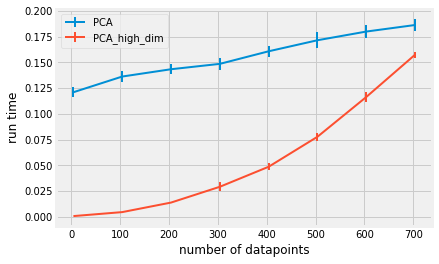

In [34]:
fig, ax = plt.subplots()
ax.set(xlabel='number of datapoints', ylabel='run time')
ax.errorbar(times0[:, 0], times0[:, 1], times0[:, 2], label="PCA", linewidth=2)
ax.errorbar(times1[:, 0], times1[:, 1], times1[:, 2], label="PCA_high_dim", linewidth=2)
ax.legend();

In [35]:
%time PCA(Xbar, 2)
%time PCA_high_dim(Xbar, 2)
pass

CPU times: user 325 ms, sys: 60.7 ms, total: 386 ms
Wall time: 201 ms
(1000, 1000)
CPU times: user 584 ms, sys: 83.1 ms, total: 667 ms
Wall time: 338 ms
